<a href="https://colab.research.google.com/github/Gkdas2k1/CognoRise-Infotech/blob/main/Diabeties_Prediction_Cognorise_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.select_dtypes('object'):
  df[column] = le.fit_transform(df[column])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [ ]:
df['age']=df['age'].astype(int)

In [ ]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,4,25.19,6.6,140,0
1,0,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,4,27.32,5.7,158,0
3,0,36,0,0,1,23.45,5.0,155,0
4,1,76,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80,0,0,0,27.32,6.2,90,0
99996,0,2,0,0,0,17.37,6.5,100,0
99997,1,66,0,0,3,27.83,5.7,155,0
99998,0,24,0,0,4,35.42,4.0,100,0


In [ ]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

<Axes: >

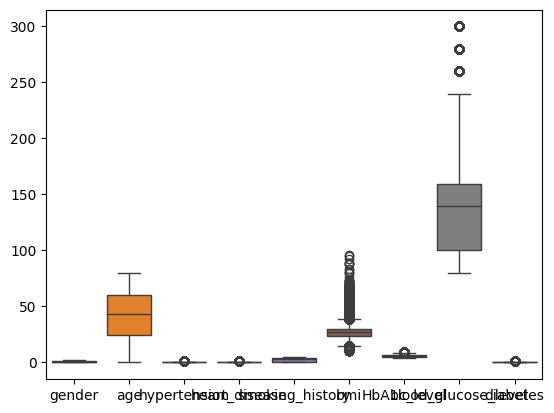

In [ ]:
sns.boxplot(data=df)

In [ ]:
col = list(df.columns)
col.remove('diabetes')

<Axes: >

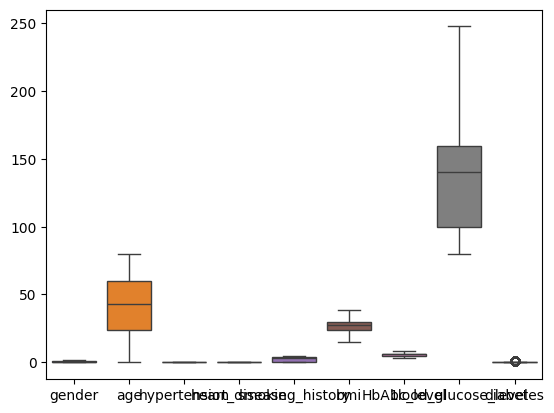

In [ ]:
for i in col:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    df[i] = np.where(df[i] > upper, upper, np.where(df[i] < lower, lower, df[i]))
sns.boxplot(data=df)

<Axes: >

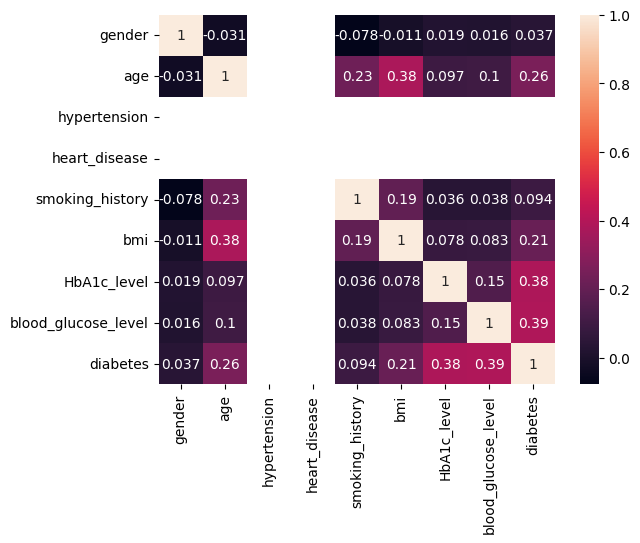

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.drop(['hypertension','heart_disease'],axis=1,inplace=True)

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
y.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x,y)
y_resampled.value_counts()

diabetes
0    91500
1    91500
Name: count, dtype: int64

In [ ]:
x = x_resampled.values
y = y_resampled.values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train

array([[  1.        ,  50.94412412,   3.94412412,  33.46398679,
          5.81117518, 145.        ],
       [  0.        ,  80.        ,   3.64793897,  27.34464427,
          7.04644272, 220.        ],
       [  1.        ,   2.        ,   4.        ,  24.05      ,
          6.6       ,  90.        ],
       ...,
       [  1.        ,  55.86681165,   2.43340582,  28.57431231,
          7.95327534, 155.        ],
       [  0.89530292,  64.10469708,   0.        ,  32.20775902,
          6.68845474, 240.        ],
       [  0.6540656 ,  51.6540656 ,   3.6540656 ,  31.13485736,
          8.02325248, 126.        ]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x

array([[  0.        ,  80.        ,   4.        ,  25.19      ,
          6.6       , 140.        ],
       [  0.        ,  54.        ,   0.        ,  27.32      ,
          6.6       ,  80.        ],
       [  1.        ,  28.        ,   4.        ,  27.32      ,
          5.7       , 158.        ],
       ...,
       [  1.        ,  66.        ,   4.        ,  27.83003819,
          7.7079852 , 200.        ],
       [  0.        ,  71.        ,   3.41492459,  38.17443239,
          6.2074623 , 247.5       ],
       [  0.        ,  70.53985022,   4.53985022,  27.27398502,
          8.2       , 126.        ]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression

knn=KNeighborsClassifier(n_neighbors=7)
bayes=BernoulliNB()
model=SVC()
forest=RandomForestClassifier()
tree=DecisionTreeClassifier()
AdaBoost = AdaBoostClassifier()
Linear = LinearRegression()
lst=[knn,bayes,forest,model,tree,AdaBoost,Linear]

In [ ]:
for i in lst[:-1]:
  print('Model is',i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  y_pred
  print(y_pred)
  print("CM is")
  print(confusion_matrix(y_test,y_pred))
  print("Accurcay score is",accuracy_score(y_test,y_pred))
  print("Classification report is")
  print(classification_report(y_test,y_pred))
  print('*'*100)

Model is KNeighborsClassifier(n_neighbors=7)
[1 0 0 ... 1 1 1]
CM is
[[17066  1227]
 [  788 17519]]
Accurcay score is 0.9449453551912569
Classification report is
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     18293
           1       0.93      0.96      0.95     18307

    accuracy                           0.94     36600
   macro avg       0.95      0.94      0.94     36600
weighted avg       0.95      0.94      0.94     36600

****************************************************************************************************
Model is BernoulliNB()
[1 1 0 ... 1 1 1]
CM is
[[14290  4003]
 [ 2889 15418]]
Accurcay score is 0.8116939890710383
Classification report is
              precision    recall  f1-score   support

           0       0.83      0.78      0.81     18293
           1       0.79      0.84      0.82     18307

    accuracy                           0.81     36600
   macro avg       0.81      0.81      0.81     3660

In [ ]:
prediction = AdaBoost.predict(x_test)
prediction

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
x_train[0:6]

array([[ 1.19571506,  0.01753811,  0.83908521,  0.80485384, -0.25574227,
        -0.29762485],
       [-0.94409215,  1.36652273,  0.67239535, -0.24682665,  0.82108318,
         1.23034207],
       [ 1.19571506, -2.25480331,  0.87053155, -0.81304975,  0.43190362,
        -1.41813393],
       [ 1.19571506, -0.62984932, -1.38062591, -0.25106206,  0.08320978,
        -0.29762485],
       [-0.94409215, -1.09412189, -0.25504718, -1.29426245, -0.00396368,
        -0.29762485],
       [-0.56124758, -0.07272224, -0.71714483,  0.11708951, -0.07191731,
         0.00796854]])

In [ ]:
y_train[0:6]

array([1, 1, 0, 0, 0, 1])

In [ ]:
prediction=knn.predict(x_train[0:6])
for pred in prediction:
  if pred == 1:
    print('Diabetic')
  else:
    print('Non-Diabetic')

Diabetic
Diabetic
Non-Diabetic
Non-Diabetic
Non-Diabetic
Diabetic
